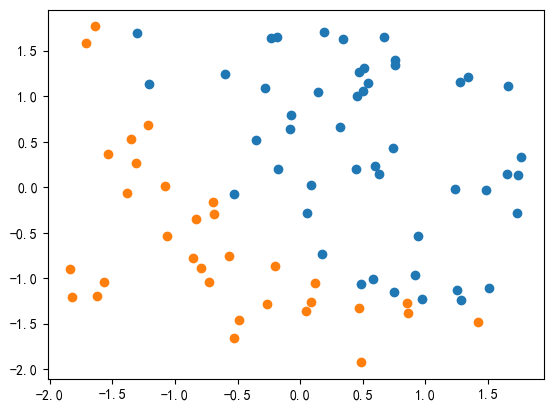

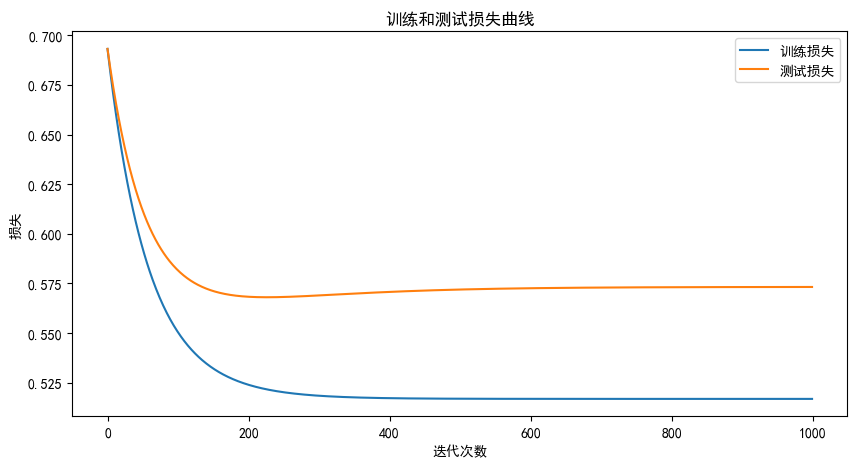

精确度: 0.9000
召回率: 0.7500
F1分数: 0.8182
AUC值: 0.9375


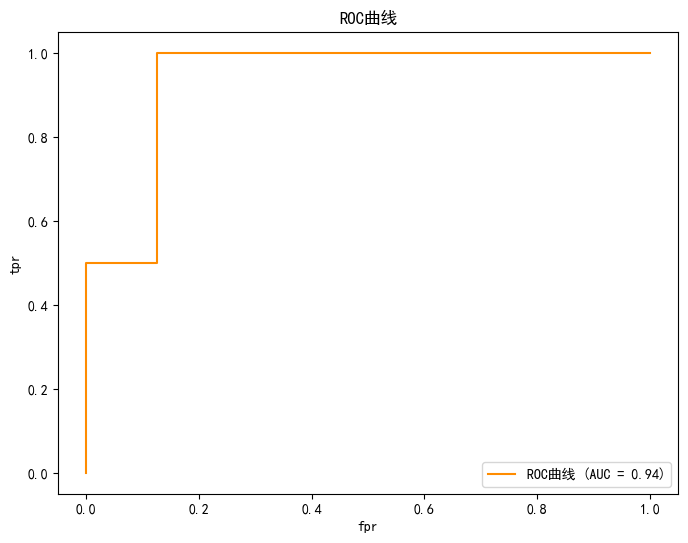

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 设置matplotlib以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 加载数据
data = pd.read_csv('ex2data1.txt', header=None)
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# 数据标准化
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, target, test_size=0.2, random_state=42)
plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1], label='Admitted')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0]
            [:, 1], label='Admitted')
# 定义Sigmoid函数


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 定义损失函数


# 定义损失函数，加入L2正则化项
def compute_loss(y_true, y_pred, weights, lambda_reg=0.1):
    # 原始的交叉熵损失
    cross_entropy_loss = - \
        np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    # L2正则化项
    l2_penalty = lambda_reg * np.sum(weights ** 2)
    return cross_entropy_loss + l2_penalty
# 计算梯度


def compute_gradient(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

# 更新权重


# 更新权重，考虑L2正则化
def update_weights(X, y, weights, learning_rate, lambda_reg=0.1):
    y_pred = sigmoid(np.dot(X, weights))
    # 原始的梯度计算
    gradient = compute_gradient(X, y, y_pred)
    # 考虑L2正则化的梯度调整
    gradient += lambda_reg * 2 * weights
    return weights - learning_rate * gradient


# 初始化权重
weights = np.zeros((X_train.shape[1], 1))

# 训练模型
iterations = 1000
learning_rate = 0.02
train_losses = []
test_losses = []

for _ in range(iterations):
    y_train_pred = sigmoid(np.dot(X_train, weights))
    train_loss = compute_loss(
        y_train.values.reshape(-1, 1), y_train_pred, weights)
    train_losses.append(train_loss)

    y_test_pred = sigmoid(np.dot(X_test, weights))
    test_loss = compute_loss(
        y_test.values.reshape(-1, 1), y_test_pred, weights)
    test_losses.append(test_loss)

    weights = update_weights(
        X_train, y_train.values.reshape(-1, 1), weights, learning_rate)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='训练损失')
plt.plot(test_losses, label='测试损失')
# plt.ylim([0.5, 1])
# print("训练损失范围：", min(train_losses), "到", max(train_losses))
# print("测试损失范围：", min(test_losses), "到", max(test_losses))

plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('训练和测试损失曲线')
plt.legend()
plt.show()

# 性能评估
y_test_pred_prob = sigmoid(np.dot(X_test, weights))
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_prob)

# 输出性能指标
print(f"精确度: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1分数: {f1:.4f}")
print(f"AUC值: {auc:.4f}")

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC曲线 (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()